# DSI Summary Research Program Initial Explore
by Qinlian Yang, Vanderbilt University

### Import Packages

In [26]:
# 1
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# 2
from sklearn.model_selection import train_test_split

# 3 random
import random
random.seed(100)

In [27]:
apple_stock_df = pd.read_csv("./apple_stock_prepared.csv")
apple_stock_df.head()

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
0,-0.464011,-0.767950,-0.747017,-0.739101,-0.639217,-0.669514,-0.646494,0.627785,-1.812133,4.368171,-1.830292,7.716514,-1.862736,8.506598,-1.880503,-0.456953,2.338571
1,-0.190969,-0.769480,-0.758587,-0.738967,-0.732728,-0.632766,-0.662760,-0.579982,-1.183392,1.505926,-1.592107,3.501353,-1.710687,5.255354,-1.767605,-0.456953,2.945714
2,-0.723175,-0.760056,-0.760125,-0.750631,-0.732592,-0.727153,-0.625758,-0.115027,-1.286573,0.152772,-1.626297,2.429129,-1.732050,4.553852,-1.782792,-0.456953,2.750000
3,-0.570132,-0.763094,-0.750650,-0.752182,-0.744357,-0.727016,-0.720797,-0.092085,-0.982726,-0.217920,-1.529132,1.347659,-1.674853,2.875177,-1.742103,-0.456953,2.941429
4,-0.692599,-0.760123,-0.753705,-0.742630,-0.745922,-0.738891,-0.720659,-0.694639,-0.034087,-0.992704,-1.141034,-0.009939,-1.444629,1.005462,-1.579137,-0.456953,3.678571


In [28]:
X = apple_stock_df[apple_stock_df.columns[0:-1]]
Y = apple_stock_df[apple_stock_df.columns[-1]]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 100)

In [30]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test,test_size=0.5, random_state = 100)

In [31]:
X_train.shape

(156, 16)

In [32]:
X_test.shape

(20, 16)

In [33]:
# x validation
X_val.shape

(20, 16)

In [34]:
def num_steps(length: int, batch_size: int):
    '''
    calculates number of steps from dataset and the batch size
    
    Parameters
    ----------
    
    length: the total length of the dataset
    batch_size: size of each batch
    
    Returns
    -------
    
    number_of_steps: number of steps per epoch
    
    '''
    return length//batch_size + 1

In [35]:
batch_size = 10
num_steps(len(X_train), batch_size)

16

### 2.  Define the neural network layers and model.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [37]:
def stock_predictor_model(x_train):
    '''
    Define the stock predictor model
    '''
    stock_predictor = Sequential()
    # One Dense layer with number of units same as features
    stock_predictor.add(Dense(10, input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(6, input_dim=10,
                    activation='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(3, input_dim=6,
                activation='relu',
                kernel_initializer='he_normal'))
    # Final dense layer
    stock_predictor.add(Dense(1, activation='relu',
                    kernel_initializer='he_normal'))
    # Using mse as loss and mape as the metric
    stock_predictor.compile(loss='mean_squared_error',
                  optimizer='rmsprop',
                  metrics=['mape'])
    return stock_predictor

In [38]:
model = stock_predictor_model(X_train)

### 3.  Visualize keras model by using Pydot

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [40]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

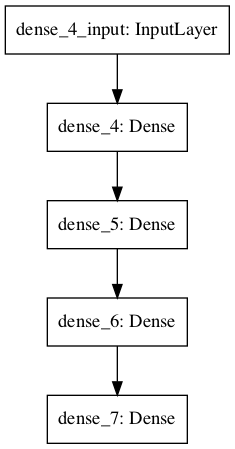

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

### 4. Train the model using basic parameters.

In [42]:
batch_size = 20
num_steps(len(X_train), batch_size)

8

In [43]:
history = model.fit(X_train, Y_train, 
                    validation_data=(X_val, Y_val),
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)
# the result:
# loss: 13212.1504 - val_mean_absolute_percentage_error: 11.7073
# this means that we are around (100-11.7073) = 89% accurate in our prediction

Epoch 1/1000
8/8 [==============================] - 0s 15ms/step - loss: 4833.9883 - mape: 99.9883 - val_loss: 24476.3516 - val_mape: 99.9810
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 4833.9678 - mape: 99.9695 - val_loss: 24476.3418 - val_mape: 99.9756
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 4833.9321 - mape: 99.9450 - val_loss: 24476.3320 - val_mape: 99.9598
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 4833.8975 - mape: 99.9028 - val_loss: 24476.3008 - val_mape: 99.8617
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 4833.8276 - mape: 99.8557 - val_loss: 24476.2715 - val_mape: 99.7580
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 4833.8003 - mape: 99.8282 - val_loss: 24476.2559 - val_mape: 99.7240
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 4833.6021 - mape: 99.8063 - val_loss: 24475.9746 - val_mape: 99.7388
Epoch 8/1000

Epoch 59/1000
8/8 [==============================] - 0s 3ms/step - loss: 1589.2896 - mape: 74.4566 - val_loss: 17200.6035 - val_mape: 69.7437
Epoch 60/1000
8/8 [==============================] - 0s 3ms/step - loss: 1494.0563 - mape: 74.5081 - val_loss: 16917.7031 - val_mape: 69.2705
Epoch 61/1000
8/8 [==============================] - 0s 3ms/step - loss: 1396.1554 - mape: 73.9168 - val_loss: 16629.4492 - val_mape: 68.7483
Epoch 62/1000
8/8 [==============================] - 0s 4ms/step - loss: 1303.9388 - mape: 73.2243 - val_loss: 16337.5342 - val_mape: 68.2035
Epoch 63/1000
8/8 [==============================] - 0s 3ms/step - loss: 1211.6567 - mape: 71.9755 - val_loss: 16044.0020 - val_mape: 67.5375
Epoch 64/1000
8/8 [==============================] - 0s 3ms/step - loss: 1121.3379 - mape: 71.0369 - val_loss: 15758.1094 - val_mape: 66.8197
Epoch 65/1000
8/8 [==============================] - 0s 2ms/step - loss: 1034.3016 - mape: 70.6012 - val_loss: 15459.0801 - val_mape: 66.1172
Epoch 

Epoch 117/1000
8/8 [==============================] - 0s 3ms/step - loss: 179.6020 - mape: 36.4182 - val_loss: 12125.7832 - val_mape: 41.9475
Epoch 118/1000
8/8 [==============================] - 0s 3ms/step - loss: 175.2819 - mape: 36.6913 - val_loss: 12113.0371 - val_mape: 41.8389
Epoch 119/1000
8/8 [==============================] - 0s 3ms/step - loss: 169.9324 - mape: 35.9186 - val_loss: 12126.3809 - val_mape: 41.2586
Epoch 120/1000
8/8 [==============================] - 0s 3ms/step - loss: 166.3409 - mape: 35.5202 - val_loss: 12095.0527 - val_mape: 40.7144
Epoch 121/1000
8/8 [==============================] - 0s 3ms/step - loss: 162.3018 - mape: 35.5156 - val_loss: 12094.3672 - val_mape: 40.5126
Epoch 122/1000
8/8 [==============================] - 0s 3ms/step - loss: 158.1723 - mape: 35.3610 - val_loss: 12075.1846 - val_mape: 40.2852
Epoch 123/1000
8/8 [==============================] - 0s 3ms/step - loss: 155.7388 - mape: 35.4245 - val_loss: 12052.7949 - val_mape: 39.9573
Epoch 

Epoch 175/1000
8/8 [==============================] - 0s 3ms/step - loss: 40.2109 - mape: 25.7494 - val_loss: 11411.5234 - val_mape: 28.6386
Epoch 176/1000
8/8 [==============================] - 0s 3ms/step - loss: 39.2935 - mape: 26.1782 - val_loss: 11405.1846 - val_mape: 28.9554
Epoch 177/1000
8/8 [==============================] - 0s 3ms/step - loss: 38.2510 - mape: 25.4545 - val_loss: 11417.8457 - val_mape: 29.2623
Epoch 178/1000
8/8 [==============================] - 0s 3ms/step - loss: 37.7315 - mape: 25.6575 - val_loss: 11448.6182 - val_mape: 28.9579
Epoch 179/1000
8/8 [==============================] - 0s 3ms/step - loss: 36.7770 - mape: 25.3958 - val_loss: 11403.6865 - val_mape: 29.7589
Epoch 180/1000
8/8 [==============================] - 0s 3ms/step - loss: 35.8406 - mape: 25.4006 - val_loss: 11383.0928 - val_mape: 29.7933
Epoch 181/1000
8/8 [==============================] - 0s 3ms/step - loss: 35.3127 - mape: 24.9419 - val_loss: 11378.6201 - val_mape: 30.1281
Epoch 182/100

Epoch 233/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.9560 - mape: 16.7158 - val_loss: 11862.9199 - val_mape: 32.1346
Epoch 234/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.8405 - mape: 16.6347 - val_loss: 11864.1318 - val_mape: 32.1648
Epoch 235/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.4469 - mape: 16.0994 - val_loss: 11861.0957 - val_mape: 33.7685
Epoch 236/1000
8/8 [==============================] - 0s 2ms/step - loss: 10.2924 - mape: 16.0939 - val_loss: 11852.6270 - val_mape: 33.4657
Epoch 237/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.1081 - mape: 16.5154 - val_loss: 11926.4277 - val_mape: 31.9288
Epoch 238/1000
8/8 [==============================] - 0s 3ms/step - loss: 9.8790 - mape: 15.7547 - val_loss: 11948.5225 - val_mape: 33.5323
Epoch 239/1000
8/8 [==============================] - 0s 3ms/step - loss: 9.6692 - mape: 16.4027 - val_loss: 11921.7363 - val_mape: 33.4700
Epoch 240/1000


8/8 [==============================] - 0s 3ms/step - loss: 4.6092 - mape: 12.5743 - val_loss: 12180.1152 - val_mape: 31.3118
Epoch 292/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.5181 - mape: 12.3579 - val_loss: 12207.2549 - val_mape: 31.1830
Epoch 293/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.6174 - mape: 12.2452 - val_loss: 12175.5088 - val_mape: 31.4465
Epoch 294/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.7202 - mape: 12.3057 - val_loss: 12131.7822 - val_mape: 33.5179
Epoch 295/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.3689 - mape: 12.4168 - val_loss: 12196.8799 - val_mape: 29.9110
Epoch 296/1000
8/8 [==============================] - 0s 2ms/step - loss: 4.4166 - mape: 12.0202 - val_loss: 12242.3447 - val_mape: 30.3383
Epoch 297/1000
8/8 [==============================] - 0s 2ms/step - loss: 4.3491 - mape: 12.3974 - val_loss: 12274.9473 - val_mape: 29.3646
Epoch 298/1000
8/8 [===============

Epoch 350/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.5826 - mape: 9.0257 - val_loss: 12281.2461 - val_mape: 28.1622
Epoch 351/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.6212 - mape: 9.8414 - val_loss: 12286.0605 - val_mape: 26.6555
Epoch 352/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.5860 - mape: 9.6848 - val_loss: 12307.9092 - val_mape: 27.0971
Epoch 353/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4786 - mape: 9.9475 - val_loss: 12380.9141 - val_mape: 24.8908
Epoch 354/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4717 - mape: 9.6441 - val_loss: 12336.1279 - val_mape: 25.0617
Epoch 355/1000
8/8 [==============================] - 0s 2ms/step - loss: 2.5550 - mape: 9.5634 - val_loss: 12367.2666 - val_mape: 24.6521
Epoch 356/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4876 - mape: 9.3796 - val_loss: 12327.3594 - val_mape: 25.5493
Epoch 357/1000
8/8 [=======

Epoch 409/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5829 - mape: 7.3566 - val_loss: 12321.4395 - val_mape: 23.2893
Epoch 410/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5489 - mape: 7.1533 - val_loss: 12310.3916 - val_mape: 21.7417
Epoch 411/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.6468 - mape: 7.2225 - val_loss: 12407.3555 - val_mape: 20.3408
Epoch 412/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.6534 - mape: 7.3605 - val_loss: 12371.5576 - val_mape: 21.9201
Epoch 413/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5783 - mape: 7.2540 - val_loss: 12370.5098 - val_mape: 21.1097
Epoch 414/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.6088 - mape: 7.1397 - val_loss: 12370.1768 - val_mape: 21.0159
Epoch 415/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5358 - mape: 7.4277 - val_loss: 12418.0869 - val_mape: 21.4782
Epoch 416/1000
8/8 [=======

Epoch 468/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2166 - mape: 6.3838 - val_loss: 12448.7549 - val_mape: 18.9512
Epoch 469/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2622 - mape: 6.3348 - val_loss: 12370.7832 - val_mape: 19.4402
Epoch 470/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2744 - mape: 6.3801 - val_loss: 12370.3564 - val_mape: 18.6851
Epoch 471/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2708 - mape: 6.2813 - val_loss: 12376.6846 - val_mape: 20.5663
Epoch 472/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2950 - mape: 6.4284 - val_loss: 12318.8574 - val_mape: 20.9437
Epoch 473/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2947 - mape: 6.0999 - val_loss: 12450.9932 - val_mape: 19.2257
Epoch 474/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2533 - mape: 6.5971 - val_loss: 12424.3838 - val_mape: 19.7807
Epoch 475/1000
8/8 [=======

Epoch 527/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.1546 - mape: 5.9051 - val_loss: 12465.8271 - val_mape: 17.0647
Epoch 528/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0692 - mape: 5.6729 - val_loss: 12450.3965 - val_mape: 16.8997
Epoch 529/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0077 - mape: 5.5621 - val_loss: 12484.6240 - val_mape: 18.2369
Epoch 530/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.1109 - mape: 5.6082 - val_loss: 12482.0684 - val_mape: 17.0898
Epoch 531/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0678 - mape: 6.2343 - val_loss: 12412.4092 - val_mape: 18.6183
Epoch 532/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0381 - mape: 5.7782 - val_loss: 12478.9316 - val_mape: 16.5708
Epoch 533/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0614 - mape: 5.5318 - val_loss: 12443.8555 - val_mape: 19.2567
Epoch 534/1000
8/8 [=======

Epoch 586/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9581 - mape: 5.3814 - val_loss: 12499.3213 - val_mape: 16.3335
Epoch 587/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9626 - mape: 5.5646 - val_loss: 12435.1855 - val_mape: 15.5384
Epoch 588/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9637 - mape: 5.1153 - val_loss: 12422.8770 - val_mape: 16.3370
Epoch 589/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9979 - mape: 5.0057 - val_loss: 12484.7949 - val_mape: 16.8199
Epoch 590/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9767 - mape: 5.4982 - val_loss: 12444.2432 - val_mape: 16.7080
Epoch 591/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9530 - mape: 5.3988 - val_loss: 12527.9043 - val_mape: 16.0630
Epoch 592/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9600 - mape: 5.2936 - val_loss: 12447.5771 - val_mape: 16.0595
Epoch 593/1000
8/8 [=======

Epoch 645/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8574 - mape: 4.8949 - val_loss: 12500.3027 - val_mape: 15.7194
Epoch 646/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8555 - mape: 4.8896 - val_loss: 12541.0049 - val_mape: 15.7249
Epoch 647/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9937 - mape: 4.7581 - val_loss: 12486.1787 - val_mape: 16.1716
Epoch 648/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8321 - mape: 4.9941 - val_loss: 12484.7676 - val_mape: 16.3631
Epoch 649/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9339 - mape: 5.6475 - val_loss: 12497.5791 - val_mape: 13.4560
Epoch 650/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8829 - mape: 5.1458 - val_loss: 12425.0645 - val_mape: 13.8130
Epoch 651/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0097 - mape: 5.0749 - val_loss: 12507.2324 - val_mape: 14.5053
Epoch 652/1000
8/8 [=======

Epoch 704/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.9259 - mape: 4.5181 - val_loss: 12557.8193 - val_mape: 12.7483
Epoch 705/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8043 - mape: 4.3812 - val_loss: 12565.9824 - val_mape: 13.2267
Epoch 706/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8408 - mape: 4.9875 - val_loss: 12475.6094 - val_mape: 13.6232
Epoch 707/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8269 - mape: 5.1381 - val_loss: 12508.2861 - val_mape: 12.8049
Epoch 708/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8794 - mape: 4.6692 - val_loss: 12484.9941 - val_mape: 14.0167
Epoch 709/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8174 - mape: 4.5502 - val_loss: 12546.9717 - val_mape: 12.5892
Epoch 710/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8667 - mape: 4.7904 - val_loss: 12532.4932 - val_mape: 12.8731
Epoch 711/1000
8/8 [=======

Epoch 763/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7156 - mape: 4.6413 - val_loss: 12535.9658 - val_mape: 12.2725
Epoch 764/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7539 - mape: 4.1960 - val_loss: 12548.2695 - val_mape: 12.9935
Epoch 765/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8046 - mape: 4.5986 - val_loss: 12533.9648 - val_mape: 12.4360
Epoch 766/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7607 - mape: 4.4877 - val_loss: 12518.0947 - val_mape: 12.2514
Epoch 767/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7647 - mape: 4.7038 - val_loss: 12439.6953 - val_mape: 13.4441
Epoch 768/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8264 - mape: 4.3242 - val_loss: 12548.4404 - val_mape: 13.1096
Epoch 769/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7909 - mape: 4.7597 - val_loss: 12575.1094 - val_mape: 11.8997
Epoch 770/1000
8/8 [=======

Epoch 822/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8534 - mape: 4.6260 - val_loss: 12526.1270 - val_mape: 12.2696
Epoch 823/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8034 - mape: 4.2155 - val_loss: 12544.2793 - val_mape: 11.6587
Epoch 824/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6983 - mape: 4.3146 - val_loss: 12597.8994 - val_mape: 11.9619
Epoch 825/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.8821 - mape: 4.3503 - val_loss: 12502.0723 - val_mape: 12.0793
Epoch 826/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7490 - mape: 4.2738 - val_loss: 12582.1211 - val_mape: 12.4374
Epoch 827/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8008 - mape: 4.4626 - val_loss: 12540.4961 - val_mape: 11.2959
Epoch 828/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7503 - mape: 4.3885 - val_loss: 12572.6729 - val_mape: 11.5076
Epoch 829/1000
8/8 [=======

Epoch 881/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6919 - mape: 4.2628 - val_loss: 12554.4512 - val_mape: 11.4322
Epoch 882/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7257 - mape: 4.1759 - val_loss: 12524.0605 - val_mape: 10.5822
Epoch 883/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8066 - mape: 4.5723 - val_loss: 12572.3105 - val_mape: 10.6129
Epoch 884/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7924 - mape: 4.5139 - val_loss: 12558.7402 - val_mape: 10.9897
Epoch 885/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7438 - mape: 4.2020 - val_loss: 12531.3701 - val_mape: 10.5263
Epoch 886/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.7077 - mape: 4.1150 - val_loss: 12605.8340 - val_mape: 11.2566
Epoch 887/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6680 - mape: 4.2758 - val_loss: 12502.9648 - val_mape: 11.4628
Epoch 888/1000
8/8 [=======

Epoch 940/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8178 - mape: 4.3240 - val_loss: 12542.8027 - val_mape: 10.5851
Epoch 941/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6736 - mape: 4.1626 - val_loss: 12505.8975 - val_mape: 11.6150
Epoch 942/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7533 - mape: 4.4497 - val_loss: 12507.5176 - val_mape: 10.9865
Epoch 943/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6924 - mape: 4.2624 - val_loss: 12555.5576 - val_mape: 10.4193
Epoch 944/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7497 - mape: 4.2528 - val_loss: 12508.0176 - val_mape: 10.2546
Epoch 945/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6477 - mape: 4.4569 - val_loss: 12527.2539 - val_mape: 10.4032
Epoch 946/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7773 - mape: 4.1717 - val_loss: 12588.1104 - val_mape: 10.1209
Epoch 947/1000
8/8 [=======

8/8 [==============================] - 0s 3ms/step - loss: 0.6519 - mape: 3.7912 - val_loss: 12478.5449 - val_mape: 10.5261
Epoch 1000/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6611 - mape: 4.1680 - val_loss: 12462.6553 - val_mape: 11.0671


### 5. Analyse the model performance using loss and accuracy curves

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

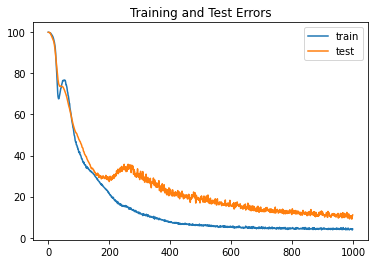

In [48]:
# plot training history
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()

### 6. Hyperparameter tuning of neural network

In [51]:
import talos
from talos.model.hidden_layers import hidden_layers

ModuleNotFoundError: No module named 'talos'

In [58]:
pip install talos

  Using cached talos-1.0-py3-none-any.whl (53 kB)
  Using cached wrangle-0.6.7-py3-none-any.whl
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached chances-0.1.9-py3-none-any.whl
  Using cached astetik-1.11.1-py3-none-any.whl (5.4 MB)
  Using cached kerasplotlib-0.1.6-py3-none-any.whl
  Using cached geonamescache-1.2.0-py3-none-any.whl (2.6 MB)


  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached scipy-1.2.0.tar.gz (23.3 MB)
  ERROR: Command errored out with exit status 1:
   command: /Users/amyking/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-wqg3z_nx/scipy_92156b3d3ca849b1bf81bcaec7c9b728/setup.py'"'"'; __file__='"'"'/private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-wqg3z_nx/scipy_92156b3d3ca849b1bf81bcaec7c9b728/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-wheel-relblu44
       cwd: /private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-wqg3z_nx/scipy_92156b3d3ca849b1bf81bcaec7c9b728/
  Complete output (3780 lines):
  /private/var/folders/l5/qsvm52vd79l5zcx0jvfg_k

  ERROR: Command errored out with exit status 1:
   command: /Users/amyking/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-wqg3z_nx/scipy_92156b3d3ca849b1bf81bcaec7c9b728/setup.py'"'"'; __file__='"'"'/private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-wqg3z_nx/scipy_92156b3d3ca849b1bf81bcaec7c9b728/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' clean --all
       cwd: /private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-wqg3z_nx/scipy_92156b3d3ca849b1bf81bcaec7c9b728
  Complete output (11 lines):
  /private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-wqg3z_nx/scipy_92156b3d3ca849b1bf81bcaec7c9b728/setup.py:114: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documen

Note: you may need to restart the kernel to use updated packages.


In [ ]:
p = {'lr': (0.1,0.5,10),
     'first_neuron':[10, 20],
     'hidden_layers':[1, 2, 3],
     'batch_size': (10,30,5),
     'epochs': [500],
     'dropout': (0, 0.5, 5),
     'shapes':['brick','funnel'],
      'activation': ['relu']
    }

In [59]:
pip install git+https://github.com/autonomio/talos

  Cloning https://github.com/autonomio/talos to /private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-req-build-u6u23zt9
  Running command git clone -q https://github.com/autonomio/talos /private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-req-build-u6u23zt9
  Using cached wrangle-0.6.7-py3-none-any.whl
  Using cached astetik-1.11.1-py3-none-any.whl (5.4 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached chances-0.1.9-py3-none-any.whl
  Using cached kerasplotlib-0.1.6-py3-none-any.whl
  Using cached geonamescache-1.2.0-py3-none-any.whl (2.6 MB)


  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached scipy-1.2.0.tar.gz (23.3 MB)
  Created wheel for talos: filename=talos-1.0.2-py3-none-any.whl size=53779 sha256=cd2776794a9e64d1e13b411278e8db18a075fcc85e82f30fa276797dd9543371
  Stored in directory: /private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-ephem-wheel-cache-o97isxdc/wheels/b7/bc/45/2f42ba3131608d45825ef411280df53cdc88daf3119a42649a
  ERROR: Command errored out with exit status 1:
   command: /Users/amyking/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-7abr5pn7/scipy_ad4804f4774e4dd1947b96fc315032df/setup.py'"'"'; __file__='"'"'/private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-7abr5pn7/scipy_ad4804f4774e4dd1947b96fc315032df/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __f

  		Constructing wrapper function "dgmresrevcom"...
  		  x,iter,resid,info,ndx1,ndx2,sclr1,sclr2,ijob = dgmresrevcom(b,x,restrt,work,work2,iter,resid,info,ndx1,ndx2,ijob,tol)
  		Constructing wrapper function "cgmresrevcom"...
  		  x,iter,resid,info,ndx1,ndx2,sclr1,sclr2,ijob = cgmresrevcom(b,x,restrt,work,work2,iter,resid,info,ndx1,ndx2,ijob,tol)
  		Constructing wrapper function "zgmresrevcom"...
  		  x,iter,resid,info,ndx1,ndx2,sclr1,sclr2,ijob = zgmresrevcom(b,x,restrt,work,work2,iter,resid,info,ndx1,ndx2,ijob,tol)
  	Wrote C/API module "_iterative" to file "build/src.macosx-10.9-x86_64-3.8/build/src.macosx-10.9-x86_64-3.8/scipy/sparse/linalg/isolve/iterative/_iterativemodule.c"
    adding 'build/src.macosx-10.9-x86_64-3.8/build/src.macosx-10.9-x86_64-3.8/build/src.macosx-10.9-x86_64-3.8/scipy/sparse/linalg/isolve/iterative/fortranobject.c' to sources.
    adding 'build/src.macosx-10.9-x86_64-3.8/build/src.macosx-10.9-x86_64-3.8/build/src.macosx-10.9-x86_64-3.8/scipy/sparse/lina

  ERROR: Command errored out with exit status 1:
   command: /Users/amyking/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-7abr5pn7/scipy_ad4804f4774e4dd1947b96fc315032df/setup.py'"'"'; __file__='"'"'/private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-7abr5pn7/scipy_ad4804f4774e4dd1947b96fc315032df/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' clean --all
       cwd: /private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-7abr5pn7/scipy_ad4804f4774e4dd1947b96fc315032df
  Complete output (11 lines):
  /private/var/folders/l5/qsvm52vd79l5zcx0jvfg_kjr0000gn/T/pip-install-7abr5pn7/scipy_ad4804f4774e4dd1947b96fc315032df/setup.py:114: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documen

Note: you may need to restart the kernel to use updated packages.
